# 例用torch.nn前馈神经网络解决上述回归、二分类、多分类任务
+ 从训练时间、预测精度、Loss变化等角度分析实验结果(最好使用图表展示）

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# 路径设置
regression_data_path = r'C:\Users\37623\jupyter_test\Lab2_Nerual_Network\dataset\regression_data'
binary_data_path = r'C:\Users\37623\jupyter_test\Lab2_Nerual_Network\dataset\binary_data'
mnist_data_path = r'C:\Users\37623\jupyter_test\Lab2_Nerual_Network\dataset\MNIST_data'

# 1. 定义前馈神经网络模型

In [3]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 2. 训练和测试函数

In [4]:
def train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, num_epochs=10):
    train_loss_list, test_loss_list = [], []
    train_acc_list, test_acc_list = [], []
    start_time = time.time()
    
    for epoch in range(num_epochs):
        model.train()
        total_loss, correct = 0, 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
            
            # 计算训练准确度（对于分类任务）
            if targets.dtype == torch.long:
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == targets).sum().item()
        
        train_loss = total_loss / len(train_loader.dataset)
        train_loss_list.append(train_loss)
        train_acc = correct / len(train_loader.dataset)
        train_acc_list.append(train_acc)
        
        # 测试模式
        model.eval()
        total_loss, correct = 0, 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                total_loss += loss.item() * inputs.size(0)
                if targets.dtype == torch.long:
                    preds = torch.argmax(outputs, dim=1)
                    correct += (preds == targets).sum().item()
        
        test_loss = total_loss / len(test_loader.dataset)
        test_loss_list.append(test_loss)
        test_acc = correct / len(test_loader.dataset)
        test_acc_list.append(test_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    total_time = time.time() - start_time
    return train_loss_list, test_loss_list, train_acc_list, test_acc_list, total_time

# 3. 加载数据

In [5]:
def load_data(path, task_type):
    if task_type == 'regression':
        train_data = pd.read_csv(f"{path}/train_data.csv")
        test_data = pd.read_csv(f"{path}/test_data.csv")
        X_train, y_train = torch.tensor(train_data.iloc[:, :-1].values, dtype=torch.float32), torch.tensor(train_data['target'].values, dtype=torch.float32).view(-1, 1)
        X_test, y_test = torch.tensor(test_data.iloc[:, :-1].values, dtype=torch.float32), torch.tensor(test_data['target'].values, dtype=torch.float32).view(-1, 1)
    elif task_type == 'binary':
        train_data = pd.read_csv(f"{path}/train_data.csv")
        test_data = pd.read_csv(f"{path}/test_data.csv")
        X_train, y_train = torch.tensor(train_data.iloc[:, :-1].values, dtype=torch.float32), torch.tensor(train_data['target'].values, dtype=torch.long)
        X_test, y_test = torch.tensor(test_data.iloc[:, :-1].values, dtype=torch.float32), torch.tensor(test_data['target'].values, dtype=torch.long)
    elif task_type == 'multi':
        # 使用 MNIST 数据集
        from torchvision import datasets, transforms
        transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
        train_data = datasets.MNIST(root=path, train=True, download=True, transform=transform)
        test_data = datasets.MNIST(root=path, train=False, download=True, transform=transform)
        return train_data, test_data
    else:
        raise ValueError("Invalid task type")
    
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
    return train_dataset, test_dataset

# 4. 训练和可视化

Epoch 1/10 - Train Loss: 0.0047, Test Loss: 0.0013
Epoch 2/10 - Train Loss: 0.0007, Test Loss: 0.0009
Epoch 3/10 - Train Loss: 0.0002, Test Loss: 0.0007
Epoch 4/10 - Train Loss: 0.0001, Test Loss: 0.0007
Epoch 5/10 - Train Loss: 0.0000, Test Loss: 0.0006
Epoch 6/10 - Train Loss: 0.0000, Test Loss: 0.0006
Epoch 7/10 - Train Loss: 0.0001, Test Loss: 0.0006
Epoch 8/10 - Train Loss: 0.0001, Test Loss: 0.0006
Epoch 9/10 - Train Loss: 0.0002, Test Loss: 0.0005
Epoch 10/10 - Train Loss: 0.0002, Test Loss: 0.0005


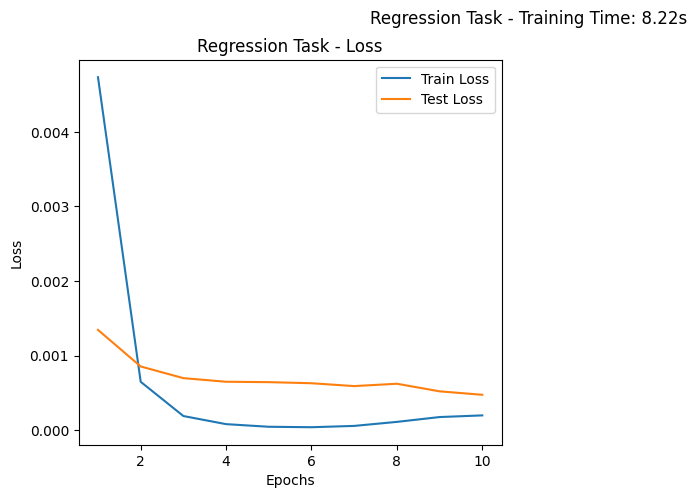

Epoch 1/10 - Train Loss: 0.0060, Test Loss: 0.0000
Epoch 2/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 3/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 4/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 5/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 6/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 7/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 8/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 9/10 - Train Loss: 0.0000, Test Loss: 0.0000
Epoch 10/10 - Train Loss: 0.0000, Test Loss: 0.0000


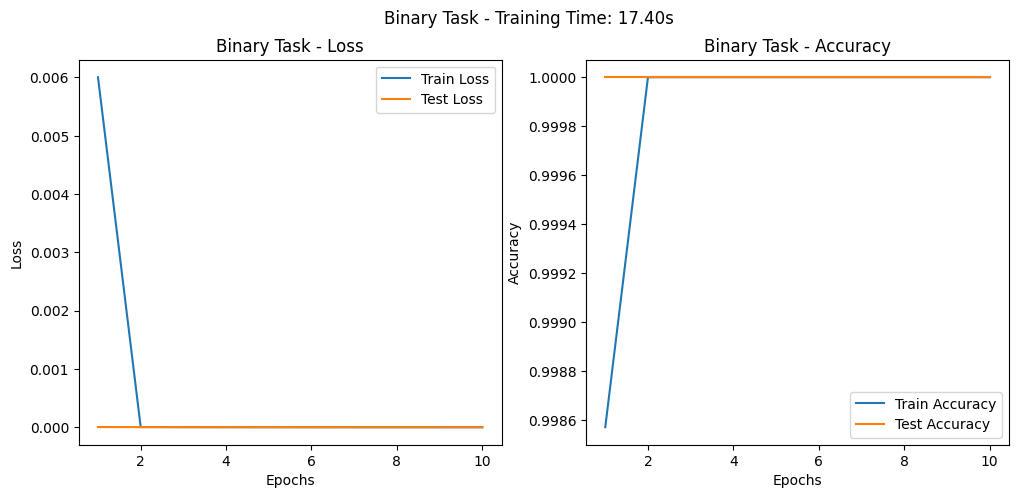

Epoch 1/10 - Train Loss: 0.2865, Test Loss: 0.1441
Epoch 2/10 - Train Loss: 0.1164, Test Loss: 0.1032
Epoch 3/10 - Train Loss: 0.0819, Test Loss: 0.0864
Epoch 4/10 - Train Loss: 0.0609, Test Loss: 0.0804
Epoch 5/10 - Train Loss: 0.0484, Test Loss: 0.0910
Epoch 6/10 - Train Loss: 0.0384, Test Loss: 0.0811
Epoch 7/10 - Train Loss: 0.0314, Test Loss: 0.0872
Epoch 8/10 - Train Loss: 0.0277, Test Loss: 0.1006
Epoch 9/10 - Train Loss: 0.0221, Test Loss: 0.0847
Epoch 10/10 - Train Loss: 0.0208, Test Loss: 0.0870


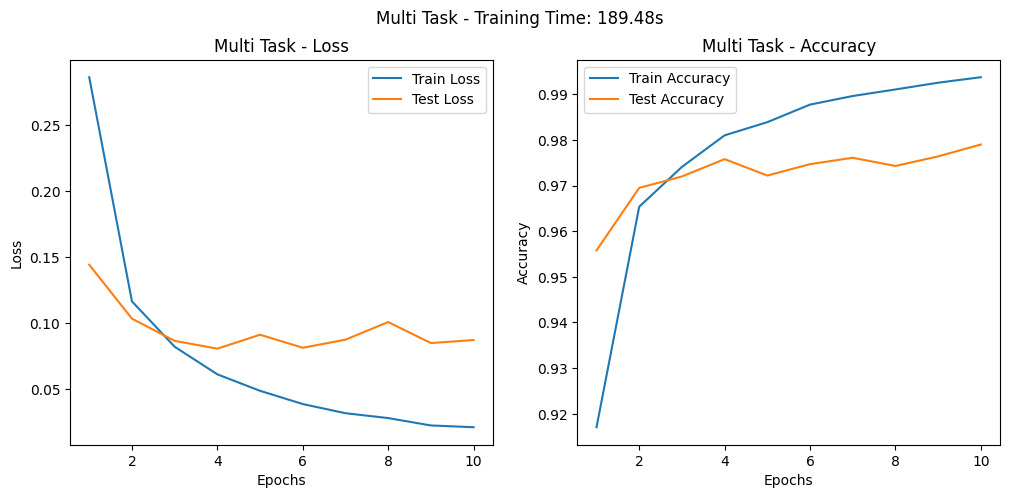

In [7]:
def run_task(data_path, task_type, input_dim, output_dim, num_epochs=10):
    train_dataset, test_dataset = load_data(data_path, task_type)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    model = SimpleNN(input_dim, output_dim)
    criterion = nn.MSELoss() if task_type == 'regression' else nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_loss, test_loss, train_acc, test_acc, total_time = train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, num_epochs)
    
    # 可视化训练过程
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, test_loss, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{task_type.capitalize()} Task - Loss')
    plt.legend()
    
    if task_type != 'regression':
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_acc, label='Train Accuracy')
        plt.plot(epochs, test_acc, label='Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'{task_type.capitalize()} Task - Accuracy')
        plt.legend()
    
    plt.suptitle(f'{task_type.capitalize()} Task - Training Time: {total_time:.2f}s')
    plt.show()

# 执行回归任务
run_task(regression_data_path, 'regression', input_dim=500, output_dim=1, num_epochs=10)

# 执行二分类任务
run_task(binary_data_path, 'binary', input_dim=200, output_dim=2, num_epochs=10)

# 执行多分类任务
run_task(mnist_data_path, 'multi', input_dim=784, output_dim=10, num_epochs=10)